# Introduction

Objective: The goal of this exercise is to evaluate your proficiency in Python programming,
usage of GitHub, and SQL skills using a real-world dataset (Iris dataset). You will be working
with a dataset to perform data manipulation, analysis, and visualization.

# 0. Local execution

<font size="5">0.1 Clone repository</font>

You can use this command if you have git installed to clone this repository: 
git clone https://github.com/Meytacro/Iris-dataset-technical-test


<font size="5">0.2 Open Notebook</font>

Navigate to the directory where you cloned the repository.

If you already have Jupyter Notebook or JupyterLab installed, simply run jupyter notebook or jupyter lab in your terminal or command line.

Navigate through the Jupyter interface to find and open the .ipynb file.
Execute the Notebook:

<font size="5">0.3 Execute Notebook</font>

Once the notebook is open in Jupyter, you can run the cells individually or all at once, as needed.

# 1. Libraries import

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

<font size="5">1.2 Plot style</font>

In [5]:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
sns.set(style="whitegrid")

pd.set_option('display.max_columns', 10)  
pd.set_option('display.max_rows', 10)     

# 2. Load Iris dataset into a Pandas DataFrame

<font size="5">2.1 Path and files declaration</font>

In [6]:
#Obtain current path
path_script = os.getcwd()

#Go back one directory
path_general = os.path.dirname(path_script)

#Build data path
data_path    = os.path.join(path_general, 'data')

#List of files in data path
files_data   = os.listdir(data_path)

print(path_script)
print(path_general)
print(data_path)

print("Files in 'data': ", files_data)

C:\Users\bymar\Iris-dataset-technical-test\scripts
C:\Users\bymar\Iris-dataset-technical-test
C:\Users\bymar\Iris-dataset-technical-test\data
Files in 'data':  ['bezdekIris.csv', 'Index', 'iris.csv', 'iris.names', 'iris.zip']


In [7]:
#Build files path
bezdeklris_data_file = os.path.join(data_path, files_data[0])
index_file           = os.path.join(data_path, files_data[1])
iris_data_file       = os.path.join(data_path, files_data[2])
iris_names_file      = os.path.join(data_path, files_data[3])

print(bezdeklris_data_file)
print(index_file)
print(iris_data_file)
print(iris_names_file)

C:\Users\bymar\Iris-dataset-technical-test\data\bezdekIris.csv
C:\Users\bymar\Iris-dataset-technical-test\data\Index
C:\Users\bymar\Iris-dataset-technical-test\data\iris.csv
C:\Users\bymar\Iris-dataset-technical-test\data\iris.names


In [9]:
#Transform .data files in .csv
new_extension = '.csv'

bezdeklris_data_file_name, _ = os.path.splitext(bezdeklris_data_file)
iris_data_file_name, _       = os.path.splitext(iris_data_file)

bezdeklris_data = bezdeklris_data_file_name+new_extension
iris_data       = iris_data_file_name+new_extension

os.rename(bezdeklris_data_file,bezdeklris_data)
os.rename(iris_data_file,iris_data)

print(bezdeklris_data)
print(iris_data)

C:\Users\bymar\Iris-dataset-technical-test\data\bezdekIris.csv
C:\Users\bymar\Iris-dataset-technical-test\data\iris.csv


<font size="5">2.2 CSV read and pre-process</font>

In [10]:
#Both files are the same so we will use df_iris (iris_data)
columns_names = ['sepal_l [cm]','sepal_w [cm]','petal_l [cm]','petal_w [cm]','class']

df_bezdeklris = pd.read_csv(bezdeklris_data, names=columns_names)
df_iris       = pd.read_csv(iris_data, names=columns_names)

df_bezdeklris
df_iris

,sepal_l [cm],sepal_w [cm],petal_l [cm],petal_w [cm],class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 3. Dataframe exploration/ Exploratory data analysis 

**Dataframe dimension:**

In [11]:
df_iris.shape

(150, 5)

**Dataframe balance:**

This dataframe is balanced, each type of iris has the same amount of data and each column has no nulls in it

In [12]:
df_iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [13]:
df_iris.isnull().sum(axis=0)

sepal_l [cm]    0
sepal_w [cm]    0
petal_l [cm]    0
petal_w [cm]    0
class           0
dtype: int64

<font size="5">3.1 Dataframe generation for each class of iris</font>

In [14]:
df_setosa     = df_iris.loc[(df_iris['class'] == 'Iris-setosa')]
df_versicolor = df_iris.loc[(df_iris['class'] == 'Iris-versicolor')]
df_virginica  = df_iris.loc[(df_iris['class'] == 'Iris-virginica')]

In [15]:
df_setosa.head(1)

,sepal_l [cm],sepal_w [cm],petal_l [cm],petal_w [cm],class
0,5.1,3.5,1.4,0.2,Iris-setosa


In [16]:
df_versicolor.head(1)

,sepal_l [cm],sepal_w [cm],petal_l [cm],petal_w [cm],class
50,7.0,3.2,4.7,1.4,Iris-versicolor


In [17]:
df_virginica.head(1)

,sepal_l [cm],sepal_w [cm],petal_l [cm],petal_w [cm],class
100,6.3,3.3,6.0,2.5,Iris-virginica


<font size="5">3.2 Univariate Analysis</font>

In [18]:
df_iris.describe()

,sepal_l [cm],sepal_w [cm],petal_l [cm],petal_w [cm]
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Definition of the function used to plot the univariate analyses in order to save lines of code.

In [40]:
def function_plot_UA(var,var_title):
    #Plot configuration
    fig, ax = plt.subplots(figsize=(6,5))

    #Histogram plot
    sns.histplot(data=df_iris[var], ax=ax, kde=False)
    ax.set_xlabel(var_title)
    ax.set_ylabel('Frequency')

    #Density curve plot
    ax2 = ax.twinx()

    # Dibujar solo la línea de KDE en el segundo eje
    sns.kdeplot(data=df_iris[var], ax=ax2, fill=False, color="r")
    ax2.set_ylabel('Density')

    fig.suptitle('Univariate Analysis: ' + var_title)

    plt.tight_layout()

    plt.show()

<font size="4">3.2.1 Sepal length [cm]</font>

In the sepal length, the highest frequency occurs between 5.5 cm and 6.25 cm, with a median of 5.8 cm. The distribution of the data approaches a normal distribution.

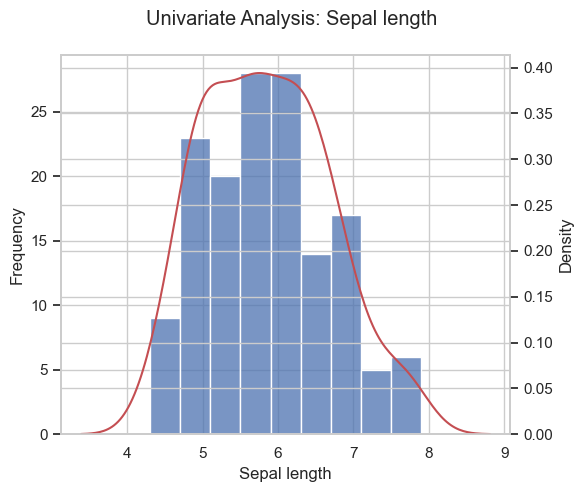

In [41]:
var = 'sepal_l [cm]'
var_title = 'Sepal length'

function_plot_UA(var,var_title)

<font size="4">3.2.2 Sepal width [cm]</font>

In the sepal width, the highest frequency occurs at 3 cm. This results in a much more peaked distribution with low dispersion.

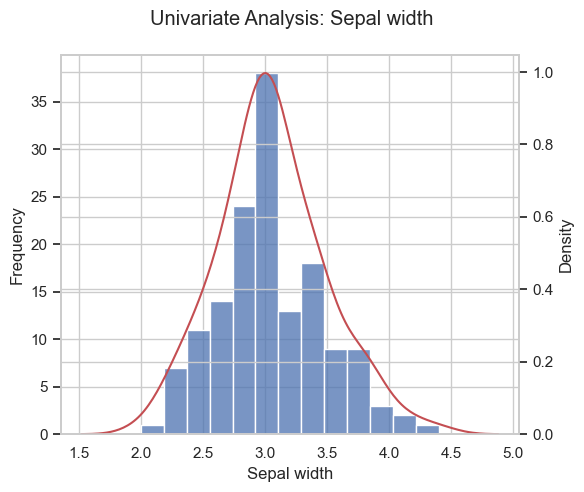

In [42]:
var = 'sepal_w [cm]'
var_title = 'Sepal width'

function_plot_UA(var,var_title)

<font size="4">3.2.3 Petal length [cm]</font>

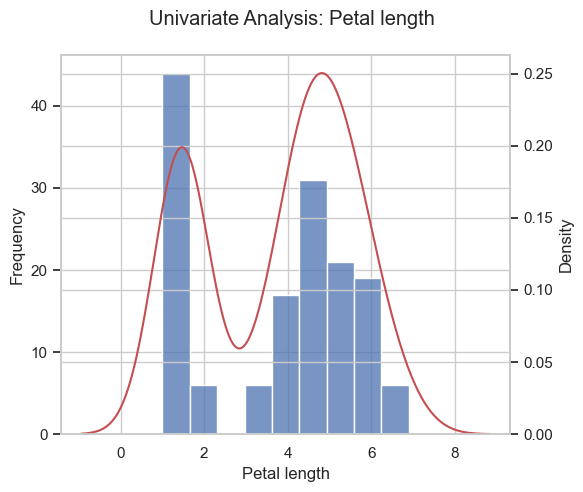

In [43]:
var = 'petal_l [cm]'
var_title = 'Petal length'

function_plot_UA(var,var_title)

<font size="4">3.2.4 Petal width [cm]</font>

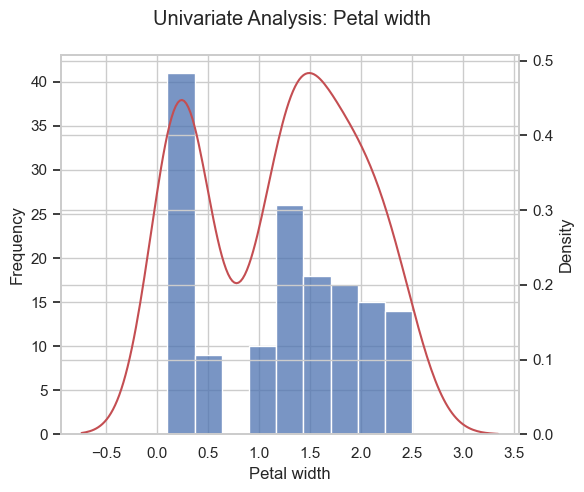

In [45]:
var = 'petal_w [cm]'
var_title = 'Petal width'

function_plot_UA(var,var_title)

<font size="5">3.3 Multivariate Analysis</font>